Found 1222 images belonging to 33 classes.
Found 294 images belonging to 33 classes.


C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.0546 - loss: 29.9743 - val_accuracy: 0.0272 - val_loss: 11.3360
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.0533 - loss: 3.7173 - val_accuracy: 0.0340 - val_loss: 20.3018
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.0866 - loss: 3.5665 - val_accuracy: 0.0952 - val_loss: 14.9150
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.0851 - loss: 3.5138 - val_accuracy: 0.0850 - val_loss: 6.0548
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.0769 - loss: 3.4915 - val_accuracy: 0.1054 - val_loss: 5.9038
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.0951 - loss: 3.6004 - val_accuracy: 0.0952 - val_loss: 4.4740
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.1039 - loss: 3.4652 - val_accuracy: 0.0952 - val_loss: 4.8586
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.0886 - loss: 3.4628 - val_accuracy: 0.0748

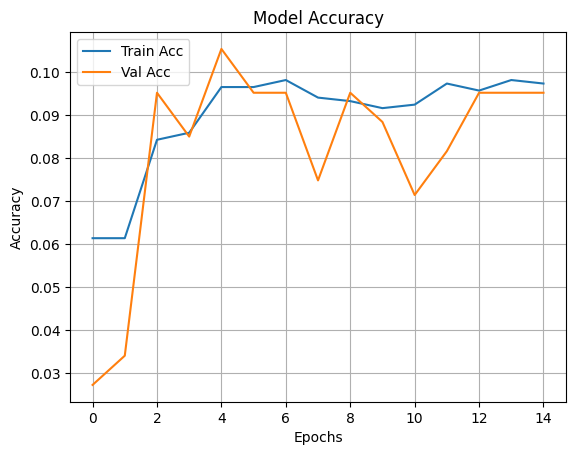

In [1]:
# Step 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Step 2: Set Paths
train_dir = 'data/train'

# Step 3: Parameters
img_height = 224
img_width = 224
batch_size = 32
epochs = 15

# Step 4: Data Preprocessing with Stronger Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=0.3,
    shear_range=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)
import json
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)
    
from tensorflow.keras.layers import BatchNormalization

# Step 5: Build Improved CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


# Step 6: Compile
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 7: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_ckpt = ModelCheckpoint('basic_cnn_model.keras', save_best_only=True)

# Step 8: Train
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stop, model_ckpt]
)

# Step 9: Evaluate
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Step 10: Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()


In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import json

# Step 1: Load class indices
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Step 2: Get predicted and true labels
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Step 3: Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

# Step 4: Classification Report
target_names = list(class_indices.keys())
print('\nClassification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))



10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  1
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0
   0  0  0  0  

ValueError: Number of classes, 30, does not match size of target_names, 33. Try specifying the labels parameter